In [1]:
# importing necessary libraries

import nltk, re, string
from nltk.corpus import stopwords, twitter_samples
from sklearn.linear_model import LogisticRegression
import numpy as np
import pickle
from typing import List

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\dkc\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dkc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
len(all_positive_tweets),len(all_negative_tweets)

(5000, 5000)

In [5]:
# split the data into two pieces, one for training and one for testing.
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

In [6]:
train_x = train_pos + train_neg
test_x = test_pos + test_neg

In [7]:
def process_tweet(tweet):
    stemmer = nltk.PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = tweet.lower()
    tokenizer = nltk.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    tweets_clean=' '.join(tweets_clean)
    return tweets_clean

In [8]:
for i in range(len(train_x)):
    train_x[i] = process_tweet(train_x[i])
    
for i in range(len(test_x)):
    test_x[i] = process_tweet(test_x[i])

In [9]:
# combine positive and negative labels
# We are building our y - target variable here
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [10]:
for i in zip(train_x, train_y):
    print(i)

('followfriday top engag member commun week :)', array([1.]))
('hey jame odd :/ pleas call contact centr 02392441234 abl assist :) mani thank', array([1.]))
('listen last night :) bleed amaz track scotland', array([1.]))
('congrat :)', array([1.]))
('yeaaah yipppi accnt verifi rqst succeed got blue tick mark fb profil :) 15 day', array([1.]))
('one irresist :) flipkartfashionfriday', array([1.]))
('like keep love custom wait long hope enjoy happi friday lwwf :)', array([1.]))
('second thought ’ enough time dd :) new short enter system sheep must buy', array([1.]))
('jgh go bayan :d bye', array([1.]))
('act mischiev call etl layer in-hous wareh app katamari well … name impli :p', array([1.]))
('followfriday top influenc commun week :)', array([1.]))
('love big ... juici ... selfi :)', array([1.]))
('follow', array([1.]))
("perfect alreadi know what' wait :)", array([1.]))
('great new opportun junior triathlet age 12 13 gatorad seri get entri :)', array([1.]))
('lay greet card rang print

('thank guy :)', array([1.]))
('fab thank support :)', array([1.]))
('realli dont love much :)', array([1.]))
('ff follow --> 10 loner side pleas :)', array([1.]))
('charger :)', array([1.]))
(':-)', array([1.]))
('introduc new word vs alter understand word x spread either big problem :)', array([1.]))
('follow', array([1.]))
('ff wooftast twoof hope supa dupa weekend :)', array([1.]))
('near enough dartmoor :)', array([1.]))
("i'm gonna stay gold colour hope come soon thank anyway :)", array([1.]))
('follow back :)', array([1.]))
('yay ok :d', array([1.]))
("someday we'll know :)", array([1.]))
('u r dii n cant forget si :)', array([1.]))
('jgh fr smf ft w girl <3 :)', array([1.]))
('mayb get japanes import hello kitti match stationari :)', array([1.]))
('weekend draw close plan :d', array([1.]))
('hi saw u follow thought u might like dark', array([1.]))
('hello twitter account broken :)', array([1.]))
('hi thank connect specialis thermal imag survey – need us :)', array([1.]))
('nice

('morn mine 1100d usual auto-focu use manual realli close like shoot vein crackl glaze :)', array([1.]))
('new layout look bomb :-) g', array([1.]))
('thank connect hope great day social websit question ask :-)', array([1.]))
('pake :)', array([1.]))
('hi made chang design hope like :)', array([1.]))
('joim feed troop :)', array([1.]))
('brand want review beauti product blog mail ladolcevitainluxembourg@hotmail.com prrequest journorequest :)', array([1.]))
('the_madstork follback ya :)', array([1.]))
('good luck shaun :)', array([1.]))
('ye :)', array([1.]))
('anyon want ad bot dm :) bot', array([1.]))
('chloe watch let yesterday realli awesom realli talent intellig actress beauti :)', array([1.]))
('could get free solo dm give away :) xoxo', array([1.]))
('thank share wish wick weekend :)', array([1.]))
("hola juan .. send big hi houston tx :) i'v fan jenni famili year' stumbl upon video", array([1.]))
('prob.nic choker btw :)', array([1.]))
('seouljin :) fine tbh', array([1.]))
('pho

('stat day arriv 1 new follow unfollow :) via', array([1.]))
('make happi :)', array([1.]))
('thank :)', array([1.]))
('funni aspect najam sethi confess ad still ... :d', array([1.]))
('happi birthday ... pricelessantiqu takesonetoknowon :-)', array([1.]))
('hey work :-)', array([1.]))
('need extra ucount point make worth tweet fun :)', array([1.]))
("i'm okay ji :)", array([1.]))
('hello :) get youth job opportun follow', array([1.]))
("love book he' big credit turkish literatur favourit book name red :)", array([1.]))
('knew give crap lol need burn :p', array([1.]))
('hi hope great time full happi :) love ... 80x', array([1.]))
('love :)', array([1.]))
('trust favourit airlin deliv alway :) :) good luck', array([1.]))
('could fun sexi girl two sexi girl :) 👉', array([1.]))
('ah thank reason right :)', array([1.]))
('follow', array([1.]))
('hello :) play yello race', array([1.]))
('gail :)', array([1.]))
('hello :) xx', array([1.]))
('cool :)', array([1.]))
("thank much kind word i'll

('thank play journeyp 4 :d', array([1.]))
("foam insid lady' bra mob river :d =d true fals", array([1.]))
('send person bulletin .. well .. tweet folk fantast :)', array([1.]))
('spring fiesta 2015 make nois awuuu aich :)', array([1.]))
('sept 4th rudramadevi anushka gunashekar sir :)', array([1.]))
("harryxhood realli pretti love feel account yaya that' nice :) talk upset", array([1.]))
("ooh what' read new humanist sound interest seen happi reader magazin :)", array([1.]))
('usernam chang :d', array([1.]))
('rape time ’ best :d', array([1.]))
('school 5 week :)', array([1.]))
('check ride csrrace android tri free', array([1.]))
(':d absolut way 2 mention lack hygien tose long cloth hot temperatur', array([1.]))
('chang mani live :) love much best idol planet ♥', array([1.]))
('thank alway share love matt :) brave weather weekend', array([1.]))
('readi ge 2015kenya :-)', array([1.]))
('great work ryan super tidi dm us size address post hagergang t-shirt :d', array([1.]))
('bad :d chan

("student around globe miss enjoy summer we'll see soon :-)", array([1.]))
('happi birthday hajur :) :)', array([1.]))
('yayi :d thank ;) gohf', array([1.]))
("wow much hate came way speak truth must'v hit nerv :) keep speak", array([1.]))
('prelim exam tomorrow :-) costacc', array([1.]))
('goodnight :d', array([1.]))
('well made 13 week nwb offici today :d wait till monday start long road walk', array([1.]))
('', array([1.]))
('everi day shud begin :-)', array([1.]))
('enjoy :)', array([1.]))
('cold :)', array([1.]))
('glad last one day :)', array([1.]))
('girl hmu sometim :)', array([1.]))
('worri thank follow hope great day long till weekend :)', array([1.]))
('love :) wow pick cala brush day', array([1.]))
('sometim choos ego relationship :)', array([1.]))
("wherev i'll alway make smile :)", array([1.]))
('sooo happi grade :d', array([1.]))
('realli like interact sunni offer help dongsaeng chorong friendship among idol :)', array([1.]))
('thank ff :) x', array([1.]))
('mani thank :

('coffe bad either :)', array([1.]))
('also catch heck lot gun hater tri associ gun um endow ... rude respons :)', array([1.]))
('yeah :)', array([1.]))
('agre sarah phone realli busi time give option :) c', array([1.]))
('thank play journeyp 4 :d', array([1.]))
('one best convers ai today pleasur meet sir :-)', array([1.]))
('name sikandar khan support pti standwdik :) westandwithik', array([1.]))
('starbuck logo stand obsess addict death lol :p', array([1.]))
('love :)', array([1.]))
("keep smile :) perhap smile renew hope someon who' lose .. • smile chariti :)", array([1.]))
('hello :) tell still keep touch zayn :)', array([1.]))
('bless friday :) جمعة_مباركة', array([1.]))
('smile enjoy time :)', array([1.]))
('min follback :)', array([1.]))
("go hoki :) biz internship post univers recruit non tech websit i'll dm info", array([1.]))
('hello n america california usa dear friend thank follow :)', array([1.]))
('juli 24 2015 01:16 mean time give love mist 45gameplay :) ilovey', array(

('tell whitey cultur rule world :)', array([1.]))
('course :)', array([1.]))
('hi sunshin :)', array([1.]))
('stat week arriv 2 new follow unfollow :) via', array([1.]))
(':) cheer mike', array([1.]))
('complet youtub intro :) excit intro full graphic graphicdesign videograph youtub', array([1.]))
('aww ok cuz make mistak :)', array([1.]))
('life cannot give joy unless realli life give time space fill :)', array([1.]))
("finish bill ted' excel adventur onto bogu journey :d", array([1.]))
('1000 view thank :-)', array([1.]))
('hahahaaah owli said knock momma said .. :)', array([1.]))
('good afternon :)', array([1.]))
('ha ha im actual happi pick :)', array([1.]))
('great news :)', array([1.]))
('next event septemb :d', array([1.]))
('live citi live near whangarei :)', array([1.]))
('ye appreci smile :d', array([1.]))
('hey folk never use account ad add main account :) kati nichola', array([1.]))
('thank paulin :)', array([1.]))
('child traffick get dare day howev spell get wors :-)', ar

('bbi might take one :)', array([1.]))
(':d true', array([1.]))
("okay get see morn that' right :-)", array([1.]))
('reserv password okay', array([1.]))
('snapchat shoshannavassil snapchat kik addmeonsnapchat dmme xxx mpoint hotel :)', array([1.]))
('ahh thank much :) xxx', array([1.]))
('wanna see beauti rotat photo work ... :p v', array([1.]))
('thank mention cours :)', array([1.]))
("that' soph posit thought :-)", array([1.]))
('see go :) ye subject pain may real make less pain', array([1.]))
('hopeless tmr :(', array([0.]))
("everyth kid section ikea cute shame i'm nearli 19 2 month :(", array([0.]))
('heart slide wast basket :(', array([0.]))
('“ hate japanes call bani :( :( ”', array([0.]))
('dang start next week work :(', array([0.]))
('oh god babi face :(', array([0.]))
('make smile :(', array([0.]))
('work neighbour motor ask said hate updat search :(', array([0.]))
(':( sialan :(', array([0.]))
('athabasca glacier 1948 :-( athabasca glacier jasper jaspernationalpark alberta e

('hoya mah alway good look :( comment a :(', array([0.]))
('without miss :(', array([0.]))
('nobodi said easi :(', array([0.]))
("i'm sorri give enough hug awhil ago b tire :( nice see luv", array([0.]))
('aw miss :(', array([0.]))
('hush gurli bring purti mouth closer made shiver :(', array([0.]))
("websit solut anyth paid can't even play properli :(", array([0.]))
('dont know tri anymor get tire :(', array([0.]))
('gol pea :(', array([0.]))
('hate know english :(', array([0.]))
('physic emot mental tierd :(', array([0.]))
("third eye' get activ :(", array([0.]))
('thnkyouuu :(', array([0.]))
('hi carolin :( neither think figur us lol', array([0.]))
('mirror beauti :(', array([0.]))
('make highlight :-( seem stop talk climb pure courag bit fishi', array([0.]))
('even anyth idek :(', array([0.]))
('miss apink perform :(', array([0.]))
('bulet gendut :(', array([0.]))
('parti goodby stage :(', array([0.]))
('noo :( know', array([0.]))
(':( hug hope rest soon', array([0.]))
('look awesom

('pleasee :(', array([0.]))
('brb lowbat :( otwolgrandtrail', array([0.]))
("i'm get back funk :( ugh suck", array([0.]))
('app work :( wewanticecream', array([0.]))
('sweat look omg :(', array([0.]))
('pleas ask upvot :(', array([0.]))
('awww thought today :(', array([0.]))
('eugh :( good weather', array([0.]))
("sara still speak occasion think izzy' left twitter :(", array([0.]))
('bore sa dorm :(', array([0.]))
('omg :-(', array([0.]))
('still one week ff :(', array([0.]))
('stream aw late ... choppi terribl point stay wait yt video anyway :(', array([0.]))
("hi paul that' good hear :( dm inform happen contact us", array([0.]))
('aw ... switch :-(', array([0.]))
("want stay till infinite' win 5:30 alreadi :(", array([0.]))
('follow alreadi :(', array([0.]))
("can't sleep work 6 1/2 hour :(", array([0.]))
('hi way home cayton bay kid great time home time :( emma jen darcey connor olivia xx', array([0.]))
('spoke age :(', array([0.]))
("still can't believ rip nail :-(", array([0.]))
(

('follow :(', array([0.]))
('miss everyth :(', array([0.]))
('halaaang :( done cri', array([0.]))
('reciev order morn flip flop :( hope forgotten', array([0.]))
('tri use twitter account caesarspalac socialreward say account meet requir ... damn twitter :(', array([0.]))
(":( we'r gonna run cali w woe :/", array([0.]))
('cant believ miss follow spree today :(', array([0.]))
('lol job sinc realiz mani fuckboy world :(', array([0.]))
('♛ ♛ ♛ 》 》 》 love much beli̇ev wi̇ll follow pleas follow pleas justi̇n :( x15 330 》 》 》 ｓｅｅ ｍｅ ♛ ♛ ♛', array([0.]))
('deliveri chrompet :(', array([0.]))
('get sick easili weather chang hot cold immun system weak', array([0.]))
('need lush bathtub ... :(', array([0.]))
('great got php 5 mysql libmysqlclient-dev sync broke dev server :(', array([0.]))
('wish could join :(', array([0.]))
('miss pleasanton friend :(', array([0.]))
("wala load e :( tri ko i'll text u later", array([0.]))
('♛ ♛ ♛ 》 》 》 love much beli̇ev wi̇ll follow pleas follow pleas justi̇n :(

('take back :( hsm canario park hotel', array([0.]))
('im sorri im get person stuff realli bother cant stop cri dont anyon talk :(', array([0.]))
("wonder i'm gonna see ukiss member one :(", array([0.]))
("wish :( faith we'll meet sam kurt one day one day ...", array([0.]))
("friend fatma'm :(", array([0.]))
('damn alex swag :(', array([0.]))
("lmfao serious can't rememb honestli .. like tho :(", array([0.]))
('miss :(', array([0.]))
('pleas follow :( wait follow back :( pleas follow back retweet repli :(', array([0.]))
(':( updat', array([0.]))
("oh forgot i'd miss cake flapjack :-( countthecost", array([0.]))
('want ihop :(', array([0.]))
('dont snapchat :(', array([0.]))
('yep oh common infra still roll countri :-(', array([0.]))
('true :(', array([0.]))
('done u pleas give know im late sorri :(', array([0.]))
(':( thank u bbi love u', array([0.]))
('call work :(', array([0.]))
('last day :-(', array([0.]))
('want sleep :(', array([0.]))
('2nd thought colleg :(', array([0.]))
('u gu

(':( swim turtl', array([0.]))
('know :(', array([0.]))
("cnn run straplin movi theatr safe ... ye that' problem lie :-( guncontrol lafayett", array([0.]))
('hahaha support song alot ppl say good :( infinit vs ah', array([0.]))
('got stung wasp im cri hard tweak keep get bigger ive never stung one hope im allerg :(', array([0.]))
("thát' i'v wrong :( powerpoint present expect diner no-no either", array([0.]))
('fun :( tri find somewher nap lunch hour', array([0.]))
('hind :(', array([0.]))
('wors :(', array([0.]))
('follow thank pleas follow :(', array([0.]))
('ticket da expir :(', array([0.]))
('ye .. could link yt u use :(', array([0.]))
('tierd :(', array([0.]))
('day day pa :( compani mean 💔 jk', array([0.]))
('oh 😢 friend 8 year help :(', array([0.]))
('miss circuit train secondari school day :(', array([0.]))
('wanna sleeep :(', array([0.]))
("join hug i'm sorri hear sodder :(", array([0.]))
('thank feedback think perhap mobitel may better heck guess :(', array([0.]))
("that' goo

('go zumba somewher els pleas studi :(', array([0.]))
("know i'm sorri :(", array([0.]))
('greekcrisi greek leav work abroad gave light word remain dark ... :(', array([0.]))
("can't go sleep normal time :(", array([0.]))
('artist heck project :(', array([0.]))
('miss long black hair :(', array([0.]))
('ubericecream ice cream avail leed :(', array([0.]))
("thought we'r suppos hangout di week :(", array([0.]))
("agre dutch sound i'm sure i'm legibl :( i'm legibl isra passport law return", array([0.]))
('want froze chocol cover banana :(', array([0.]))
('theori peopl say start zayn come back 23rd juli :( 24th today im ok', array([0.]))
('stomachach bc slice cake :( ´ ཀ 」 ∠ ): …', array([0.]))
('lion again otani 3-0 alreadi 3rd bottom chanc eh :-(', array([0.]))
('niaaa pl follow 2/4 miss :(', array([0.]))
("i'v move australia matter time :(", array([0.]))
('cute :( 💞', array([0.]))
('scheme scheme plan yet :(', array([0.]))
('second wednesday alreadi :(', array([0.]))
('paper town pleas 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features = 100,token_pattern = r'[^\s]+')
train_x=cv.fit_transform(train_x).toarray()
test_x=cv.transform(test_x).toarray()

In [12]:
cv.vocabulary_

{'week': 89,
 ':)': 5,
 'hey': 31,
 'pleas': 62,
 'thank': 75,
 'last': 42,
 'night': 57,
 'got': 26,
 'day': 17,
 'one': 59,
 'like': 44,
 'keep': 39,
 'love': 48,
 'wait': 85,
 'hope': 34,
 'happi': 29,
 'friday': 21,
 'time': 79,
 'new': 55,
 'go': 24,
 ':d': 8,
 'well': 91,
 ':p': 9,
 '...': 1,
 'follow': 20,
 'know': 41,
 'great': 27,
 'get': 23,
 'today': 80,
 ':-)': 7,
 'help': 30,
 'work': 93,
 'hi': 32,
 'need': 53,
 'u': 83,
 'thing': 77,
 'x': 95,
 "i'v": 37,
 'lol': 45,
 'year': 97,
 'see': 67,
 'us': 84,
 'kik': 40,
 'come': 15,
 'lot': 47,
 '<3': 10,
 'watch': 88,
 'oh': 58,
 'look': 46,
 'make': 49,
 'feel': 19,
 'better': 13,
 'never': 54,
 'good': 25,
 'wish': 92,
 'would': 94,
 'im': 38,
 'talk': 74,
 'ye': 96,
 "can't": 14,
 'still': 73,
 'think': 78,
 '1': 2,
 '2': 3,
 'let': 43,
 '..': 0,
 'weekend': 90,
 'realli': 63,
 'friend': 22,
 'sleep': 68,
 'want': 87,
 'miss': 50,
 'morn': 51,
 "that'": 76,
 'tri': 81,
 "i'll": 35,
 'start': 72,
 'right': 64,
 'back': 12,


In [13]:
len(cv.vocabulary_) 

100

In [14]:
cv.stop_words_ 

{'sandra',
 'weeni',
 'killua',
 'paperboy',
 'koyal',
 'debacl',
 'gray',
 'rent',
 'baechu',
 'rare',
 'munchkin',
 'nash',
 'awh',
 'peso',
 'indict',
 'yhm',
 'structur',
 'parent',
 'op',
 'dept',
 'thrown',
 'brotherhood',
 'james_yammouni',
 "they'v",
 'sheriff',
 'sentir-s',
 'haiz',
 'kidschoiceaward',
 '2/4',
 'cori',
 'everett',
 'ach',
 'warehous',
 'slowli',
 'joke',
 'contectu',
 'caus',
 'pausetim',
 'evet',
 'pa',
 'sehun',
 'mahon',
 'bien',
 'teleport',
 'across',
 'vanilla',
 'glo',
 'hit',
 'hurray',
 'beonknockknock',
 "josephine'",
 'tbc',
 'escap',
 '4000',
 'rosidbinr',
 'lmfaooo',
 'taft',
 'thurston',
 'maldiv',
 'nga',
 'mixer',
 'whahahaha',
 'klappertart',
 'depart',
 'australia',
 'yongb',
 'ayemso',
 'testicl',
 'italian',
 'brief',
 'thou',
 'bird',
 'lansi',
 'ohhh',
 'chan',
 'amb',
 'unagi',
 "ciara'",
 'vc',
 'reh',
 'mtaani',
 'porch',
 'realis',
 'bohat',
 'jackson',
 'sourc',
 'understand',
 'yeeaayi',
 'rescu',
 'oth',
 'georg',
 'beginn',
 'plss

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(train_x,train_y)

C:\Users\dkc\AppData\Local\Temp\ipykernel_1540\2323858464.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier=RandomForestClassifier().fit(train_x,train_y)


In [16]:
y_pred=classifier.predict(test_x)

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(test_y, y_pred)

array([[992,   8],
       [  4, 996]], dtype=int64)

C:\Users\dkc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


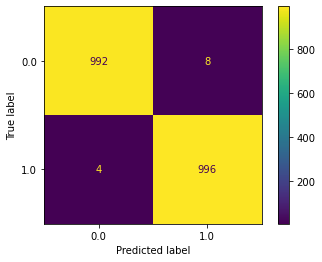

In [20]:
plot_confusion_matrix(classifier,test_x, test_y)

In [21]:
classifier.score(test_x, test_y)

0.994

In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(train_x, train_y)

C:\Users\dkc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred=logistic.predict(test_x)

In [24]:
confusion_matrix(test_y, y_pred)

array([[990,  10],
       [  1, 999]], dtype=int64)

In [25]:
logistic.score(test_x, test_y)

0.9945

C:\Users\dkc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


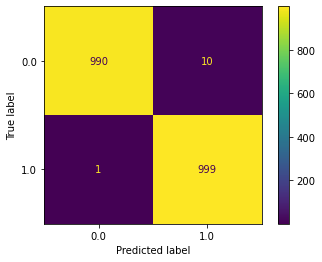

In [26]:
plot_confusion_matrix(logistic,test_x, test_y )

In [34]:
def predict_sentiment(tweet):
    tweet = process_tweet(tweet)
    tweet = cv.transform([tweet])
    if logistic.predict(tweet) == 1:
        sentiment = 'Positive Sentiment'
    elif logistic.predict(tweet) == 0:
        sentiment = 'Negetive Sentiment'
    else:
        sentiment = 'Neutral Sentiment'
    return sentiment
        
    

In [35]:
tweet = 'It is so hot today but it is the perfect day for a beach party'

In [38]:
predict_sentiment(tweet)

'Negetive Sentiment'

In [37]:
tweet = 'Sorry for being late, I will be on time next time'